# 1. Single Value Decomposition 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],-1)/255.0
x_test= x_test.reshape(x_test.shape[0],-1)/255.0

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(x_train)
X_train_recovered = pca.inverse_transform(X_train_reduced)
X_test_reduced = pca.transform(x_test)
X_test_recovered = pca.inverse_transform(X_test_reduced)

In [ ]:
np.max(pca.explained_variance_ratio_)

0.09704664359670248

In [ ]:
pca.n_components_

2

In [ ]:
pca.explained_variance_ratio_.sum()

0.16800588411806772

In [ ]:
X_train_reduced.shape

(60000, 2)

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=[X_train_reduced[:100,0],XX_train_reduced[:100,1]]
    legend="full",
    alpha=0.3
)

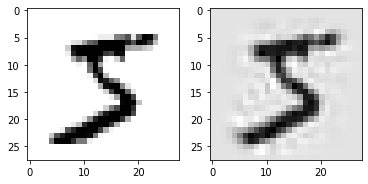

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(x_train[0].reshape(28,28),cmap=plt.cm.binary)
plt.subplot(122)
plt.imshow(X_train_recovered[0].reshape(28,28),cmap=plt.cm.binary)

In [ ]:
X_train_reduced_3D=X_train_reduced.reshape(60000,14,14)
X_test_reduced_3D=X_test_reduced.reshape(10000,14,14)
import numpy as np
X_train_reduced_4D= X_train_reduced_3D[..., np.newaxis]
X_test_reduced_4D= X_test_reduced_3D[..., np.newaxis]

In [ ]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(15, input_dim=196, activation='relu'))
# model.add(tf.keras.layers.Dense(12, activation='relu'))
# model.add(tf.keras.layers.Dense(8, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))
# model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 15)                2955      
                                                                 
 dense_12 (Dense)            (None, 12)                192       
                                                                 
 dense_13 (Dense)            (None, 8)                 104       
                                                                 
 dense_14 (Dense)            (None, 10)                90        
                                                                 
Total params: 3,341
Trainable params: 3,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=5, strides=1,activation='tanh',padding="same",input_shape=[14,14,1]),
    keras.layers.AvgPool2D(pool_size=2),
    keras.layers.Conv2D(filters=16, kernel_size=5, strides=1,activation='tanh',padding="valid"),
    keras.layers.AvgPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=84, activation='tanh'),
    keras.layers.Dense(units=10, activation='softmax')
])     

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_reduced_4D, y_train, validation_data=(X_test_reduced_4D, y_test),epochs=2)

Epoch 1/2
1875/1875 [==============================] - 16s 8ms/step - loss: 0.9624 - accuracy: 0.6827 - val_loss: 0.5764 - val_accuracy: 0.8217
Epoch 2/2
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5217 - accuracy: 0.8381 - val_loss: 0.4495 - val_accuracy: 0.8635


In [ ]:
predictions = model.predict(X_test_reduced_4D)
print(predictions[9])
print(np.argmax(predictions[9]))

[8.3848763e-06 2.9824093e-06 4.7603985e-06 6.6276873e-05 1.1173909e-01
 2.1385809e-04 3.9096609e-05 7.1093522e-02 1.9155925e-03 8.1491643e-01]
9


In [ ]:
y_test[9]

9

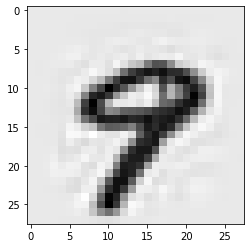

In [ ]:
plt.imshow(X_test_recovered[9].reshape(28,28),cmap=plt.cm.binary)

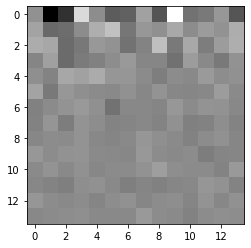

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_test_reduced_4D[9].reshape(14,14),cmap=plt.cm.binary)
plt.show()

# 2. Principal Component Analysis

In [1]:
import scipy.linalg as ln
import numpy as np

In [2]:
m, n = 2, 3
n_diag = min(m, n)

In [3]:
n_diag

2

In [4]:
np.random.seed(42)
A = np.random.rand(m, n)
A

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452]])

In [5]:
U, S_diag, V = ln.svd(A)

In [6]:
S = np.zeros((n_diag, n_diag))
np.fill_diagonal(S, S_diag)
S

array([[1.32500252, 0.        ],
       [0.        , 0.48102966]])

In [7]:
S = np.concatenate((S, np.zeros((m, 1))), axis = 1)
S

array([[1.32500252, 0.        , 0.        ],
       [0.        , 0.48102966, 0.        ]])

In [8]:
U

array([[-0.94060814, -0.33949423],
       [-0.33949423,  0.94060814]])

In [9]:
#Kiểm tra coi ma trận U có trực giao hay không U^TU-I=0
ln.norm(np.dot(U.T,U)-np.eye(m, m),'fro')


2.220446049250313e-16

In [10]:
V

array([[-0.4192721 , -0.71487943, -0.5596055 ],
       [ 0.90628265, -0.36590179, -0.21158363],
       [-0.05350387, -0.59587187,  0.80129523]])

In [11]:
#Kiểm tra coi ma trận V có trực giao hay không V^TV-I=0
ln.norm(np.dot(V.T,V)-np.eye(n, n), 'fro')

9.534353327576943e-16

In [12]:
S_diag

array([1.32500252, 0.48102966])

In [13]:
S

array([[1.32500252, 0.        , 0.        ],
       [0.        , 0.48102966, 0.        ]])

In [14]:
ln.norm(np.dot(U, S.dot(V))-A,'fro')

7.947987303456224e-16

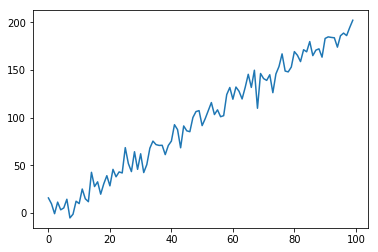

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
x = np.arange(n)

# add 1 column in the last of X to create X matrix
X = np.concatenate((x.reshape(n, 1), np.ones((n, 1))), axis = 1)
y = np.random.randn(n)*10 + 2*x
plt.plot(x, y)

In [16]:
A = np.dot(X.T, X)
b = np.dot(X.T, y)
A

array([[3.2835e+05, 4.9500e+03],
       [4.9500e+03, 1.0000e+02]])

In [17]:
U, S_diag, V = np.linalg.svd(A)
S = np.zeros((S_diag.shape[0], S_diag.shape[0]))
np.fill_diagonal(S, S_diag)
S_inv = np.linalg.inv(S)
S_inv

array([[3.04483864e-06, 0.00000000e+00],
       [0.00000000e+00, 3.94148970e-02]])

In [18]:
#trọng số bằng w=A giả nghịch đảo x b
#A giả nghịch đảo =V*S^-1*U^T
A_pse =  np.dot(V.T, np.dot(S_inv, U))
w_svd = np.dot(A_pse, b)
w_svd

array([ 2.01982256, -2.49959388])

Image shape: (183, 275, 3)


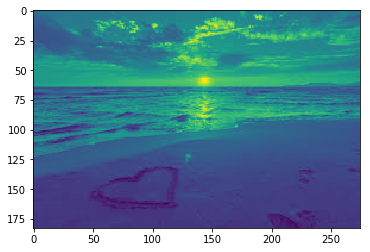

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as ln
from PIL import Image
import urllib.request
from io import BytesIO

%matplotlib inline

url = str('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQl2byL-MUxDQdTjiLwjXJPpleqt7F7fY4Afg&usqp=CAU')
with urllib.request.urlopen(url) as url:
    f = BytesIO(url.read())

ig = np.array(Image.open(f))
print('Image shape: %s'%str(ig.shape))
# Convert to grey
ig = ig.dot([0.299, 0.5870, 0.114])
plt.imshow(ig)

In [20]:
#Lấy 20 trị riêng lớn nhất
#Take m, n shape
m = ig.shape[0]
n = ig.shape[1]
#Singular Value Decomposition
U, S, V = ln.svd(ig)
id_trunc = np.argsort(S)[::-1][:20]
id_trunc

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)

In [21]:
U_t = U[np.ix_(np.arange(m), id_trunc)]
V_t = V[np.ix_(id_trunc, np.arange(n))]
S_diag = S[id_trunc]
S_t = np.zeros((20, 20))
np.fill_diagonal(S_t, S_diag)

In [22]:
A = np.dot(U_t, S_t.dot(V_t))

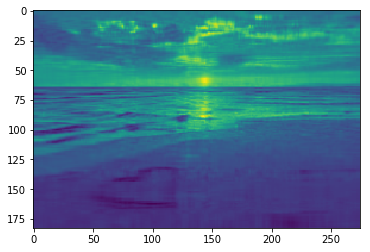

In [23]:
fb = ln.norm(A-ig, 'fro')
prt_retain = (1-fb**2/np.sum(S**2))*100
plt.imshow(A)

In [24]:
prt_retain

99.61288497889372

In [25]:
U.shape,S.shape,V.shape

((183, 183), (183,), (275, 275))

In [26]:
U_t.shape,S_t.shape,V_t.shape

((183, 20), (20, 20), (20, 275))

In [27]:
A.shape
#Ma trận 183x275 giảm thành 3 ma trận 183x20,20x20,20x275

(183, 275)